In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import pickle
import swifter
import scipy.stats as sps
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.manifold import TSNE
pd.set_option('max_columns',None)


In [19]:
def_data = pd.read_pickle('../../FootballPlayerFootedness_copy/data/defender_clusters/defender_attrs_def_region_wise.pkl')

In [20]:
def_data.head()

,index,player_name,team,position,footedness,matches_played,passes,accpass,progaccpass,proginaccpass,accpassloc,inaccpassloc,progaccpassloc,proginaccpassloc,accpassvaep,inaccpassvaep,progaccpassvaep,proginaccpassvaep,accpassoff,inaccpassoff,progaccpassoff,proginaccpassoff,accpassdef,inaccpassdef,progaccpassdef,proginaccpassdef,progaccidx,proginaccidx,offsum_regionwise,vaepsum_regionwise,prog_acc_region_per_pass,vaep_acc_region_per_pass,prog_inacc_region_per_pass,vaep_inacc_region_per_pass,off_acc_region_per_pass,off_inacc_region_per_pass,def_acc_region_per_pass,def_inacc_region_per_pass,vaep_avgcontri,vaep_stdcontri,off_avgcontri,off_stdcontri,progpreference_per_region,progaccuracy_per_region,total_off_region_per_pass
0,0,AaronCresswell,West Ham,LB,left,7.0,275,203,43,47,"[[[11.44, 47.6], [10.4, 48.96]], [[21.84, 58.4...","[[[22.88, 65.28], [31.2, 63.24]], [[24.96, 61....","[[[73.84, 66.64], [94.64, 63.92]], [[63.44, 55...","[[[24.96, 61.2], [49.92, 37.4]], [[40.56, 64.6...","[-0.0060007767751812935, 0.014951384626328945,...","[-0.005001368001103401, 0.0014556727837771177,...","[0.010874261148273945, -0.0008622575551271439,...","[0.0014556727837771177, -0.004146812949329615,...","[-0.00111871468834579, 0.0030969707295298576, ...","[-0.0018319590017199516, 0.0011951092164963484...","[0.010732980445027351, -0.0017494764178991318,...","[0.0011951092164963484, -0.0003939601592719555...","[-0.00488206185400486, 0.011854413896799088, 0...","[-0.003169409232214093, 0.00026056356728076935...","[0.00014128070324659348, 0.0008872188627719879...","[0.00026056356728076935, -0.003752852790057659...","[5, 11, 17, 22, 29, 32, 43]","[13, 19, 23, 27, 34, 40, 47]","[-0.057076123310253024, 0.4220066689886153, -0...","[-0.14396203577052802, 0.430011440301314, -0.7...","[2.33, 2.33, 2.33, 2.33, 53.49, 20.93, 9.3, 6.98]","[4.351908341050148, 2.852484816685319, 11.1506...","[0, 4.26, 0, 0, 36.17, 38.3, 4.26, 17.02]","[0, -0.8253974374383688, 0, 0, -4.327049506280...","[3.6003405693918467, 5.269106011837721, 3.0451...","[0, 0.31970476265996695, 0, 0, -3.263597869697...","[0.7515675388276577, -2.416621195152402, 8.105...","[0, -1.1451022000983357, 0, 0, -1.063451554407...","[0.9342104645600896, 1.0827897613881674, 0.775...","[0.06343649559828328, 0.6141743411469782, 0.08...","[0.9493693328310915, 0.9830857439857432, 0.757...","[0.04123265795760745, 0.4339513515622891, 0.07...","[1.11, 3.33, 1.11, 1.11, 44.44, 30.0, 6.67, 12...","[100.0, 33.33, 100.0, 100.0, 57.5, 33.33, 66.6...","[3.6003405693918467, 1.9695051790525517, 3.045..."
1,1,AaronCresswell,West Ham,LCB,left,20.0,796,644,184,91,"[[[27.04, 51.68], [55.12, 64.6]], [[65.52, 61....","[[[62.4, 51.0], [78.0, 49.64]], [[79.04, 61.2]...","[[[27.04, 51.68], [55.12, 64.6]], [[61.36, 59....","[[[62.4, 51.0], [78.0, 49.64]], [[79.04, 61.2]...","[0.0010694738011807203, 0.002371369395405054, ...","[-0.00956201646476984, -0.007710381411015987, ...","[0.0010694738011807203, 0.002284318208694458, ...","[-0.00956201646476984, -0.007710381411015987, ...","[0.0018120664171874523, 0.002711281180381775, ...","[-0.006647953763604164, -0.006097717210650444,...","[0.0018120664171874523, 0.0021007489413022995,...","[-0.006647953763604164, -0.006097717210650444,...","[-0.0007425926742143929, -0.000339911784976720...","[-0.002914062701165676, -0.001612664433196187,...","[-0.0007425926742143929, 0.0001835691509768366...","[-0.002914062701165676, -0.001612664433196187,...","[14, 28, 35, 49, 57, 65, 80, 95, 100, 106, 118...","[10, 12, 17, 23, 25, 32, 37, 42, 44, 46, 48, 5...","[0.12159526557661593, 0.7864310317672789, 0.53...","[0.12645460478961468, 0.7321038860827684, 0.47...","[1.63, 0, 0.54, 0, 66.3, 19.57, 8.15, 3.8]","[16.502801328897476, 0, 3.1730758491903543, 0,...","[2.2, 3.3, 0, 2.2, 37.36, 36.26, 10.99, 7.69]","[-0.38534030318260193, 1.5773851579676073, 0, ...","[2.848291303962469, 0, 1.703751739114523, 0, 5...","[-0.1581189571879804, -0.8412844811876615, 0, ...","[13.65451041298608, 0, 1.4693241100758314, 0, ...",

In [21]:
cb_data = def_data.loc[def_data['position'].str.contains('CB')]

In [22]:
cb_data_progfil = cb_data.loc[cb_data['progaccpass'] + cb_data['proginaccpass'] >= 20]

In [23]:
len(cb_data_progfil)

172

In [24]:
cb_data_fil = cb_data_progfil[['player_name','team','position','footedness','matches_played','progaccpass','proginaccpass',
                              'accpassloc','inaccpassloc','progpreference_per_region','total_off_region_per_pass','off_avgcontri']]

In [25]:
cb_data_fil.reset_index(inplace = True)

In [35]:
def get_ind_regions(df):
    df1 = pd.DataFrame(df['progpreference_per_region'].tolist(), columns = ['def_LF_pref','def_LC_pref','def_RC_pref','def_RF_pref','att_LF_pref','att_LC_pref','att_RC_pref','att_RF_pref'])
    df2 = pd.DataFrame(df['total_off_region_per_pass'].tolist(), columns = ['def_LF_off','def_LC_off','def_RC_off','def_RF_off','att_LF_off','att_LC_off','att_RC_off','att_RF_off'])
    df3 = pd.DataFrame(df['off_avgcontri'].tolist(), columns = ['att_LF_offcontri','att_LC_offcontri','att_RC_offcontri','att_RF_offcontri'])
    df = pd.concat([df,df1,df2,df3], axis = 1)
    df.drop(['progpreference_per_region','total_off_region_per_pass','off_avgcontri'], axis = 1, inplace = True)
    return df

In [36]:
cb_data_cluster = get_ind_regions(cb_data_fil)

In [37]:
cb_data_cluster.head()

,index,player_name,team,position,footedness,matches_played,progaccpass,proginaccpass,accpassloc,inaccpassloc,def_LF_pref,def_LC_pref,def_RC_pref,def_RF_pref,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,def_LF_off,def_LC_off,def_RC_off,def_RF_off,att_LF_off,att_LC_off,att_RC_off,att_RF_off,att_LF_offcontri,att_LC_offcontri,att_RC_offcontri,att_RF_offcontri
0,1,AaronCresswell,West Ham,LCB,left,20.0,184,91,"[[[27.04, 51.68], [55.12, 64.6]], [[65.52, 61....","[[[62.4, 51.0], [78.0, 49.64]], [[79.04, 61.2]...",1.82,1.09,0.36,0.73,56.73,25.09,9.09,5.09,1.645727,-0.841284,1.703752,0.113256,4.098572,10.470576,19.408194,2.985546,0.955638,0.787810,0.797654,0.757382
1,7,AdrianMariappa,Watford,L_CB,right,5.0,29,17,"[[[36.4, 45.56], [74.88, 48.28]], [[30.16, 46....","[[[43.68, 20.4], [42.64, 26.52]], [[27.04, 59....",4.35,0.00,0.00,2.17,43.48,23.91,15.22,10.87,3.170753,0.000000,0.000000,0.340249,1.573852,3.925124,10.267141,3.539957,1.116967,0.753206,0.736977,1.015065
2,9,AdrianMariappa,Watford,RCB,right,11.0,71,26,"[[[31.2, 10.2], [52.0, 19.72]], [[27.04, 9.52]...","[[[28.08, 9.52], [60.32, 8.16]], [[11.44, 10.2...",3.09,4.12,4.12,6.19,8.25,10.31,19.59,44.33,-1.607735,3.265536,0.043495,4.513858,3.459880,13.321521,5.660290,3.638874,0.960691,0.694656,0.716860,0.932983
3,10,AdrianMariappa,Watford,R_CB,right,4.0,27,8,"[[[30.16, 14.96], [70.72, 10.2]], [[38.48, 9.5...","[[[41.6, 2.04], [71.76, 6.8]], [[23.92, 11.56]...",14.29,2.86,2.86,0.00,8.57,25.71,17.14,28.57,1.603522,4.613615,-1.039467,0.000000,4.365592,26.320795,1.666600,1.050037,0.893748,0.695401,0.748157,0.726025
4,11,AhmedHegazi,West Brom,CB,right,7.0,45,14,"[[[26.0, 31.28], [30.16, 44.88]], [[30.16, 27....","[[[10.4, 4.08], [39.52, 6.8]], [[28.08, 35.36]...",3.39,0.00,0.00,5.08,23.73,15.25,16.95,35.59,1.878971,0.000000,0.000000,-0.170290,3.901891,7.576896,19.058473,3.556777,1.008954,0.813059,0.804224,1.039851


In [38]:
# Function to get x and y coordinates of pass locations
def getxy(locs):
    x = list()
    y = list()
    for p in locs:
        x.append(p[0])
        y.append(p[1])
    return x,y

In [39]:
# Function to get start and end location points for every row in df
def getstartend(locs):
    end_points = list()
    start_points = list()
    for point in locs:
            if point != []:
                end_points.append(point[1])
                start_points.append(point[0])
    return start_points,end_points

In [40]:
def est_dense_reg(a, b, p):
    df_kde = pd.DataFrame(columns=['x', 'y'])
    df_kde['x'] = a
    df_kde['y'] = b
    kde = sps.gaussian_kde(df_kde.values.T)
    xx, yy = np.meshgrid(
    np.linspace(0, 104, 500),
    np.linspace(0, 68, 500))
    z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    zi = z > np.max(z) * (p/10)
    x1 = [min(xx[zi]), max(xx[zi])]
    y1 = [min(yy[zi]), max(yy[zi])]
    return x1, y1

In [41]:
cb_data_cluster['accpassloc'] = cb_data_cluster['accpassloc'].swifter.set_npartitions(8).apply(lambda x: getstartend(x))
cb_data_cluster['accpassloc'] = cb_data_cluster['accpassloc'].swifter.set_npartitions(8).apply(lambda x: x[0])
cb_data_cluster['inaccpassloc'] = cb_data_cluster['inaccpassloc'].swifter.set_npartitions(8).apply(lambda x: getstartend(x))
cb_data_cluster['inaccpassloc'] = cb_data_cluster['inaccpassloc'].swifter.set_npartitions(8).apply(lambda x: x[0])
cb_data_cluster['contour_bounds'] = cb_data_cluster['accpassloc']+cb_data_cluster['inaccpassloc']

In [42]:
cb_data_cluster['contour_bounds'] = cb_data_cluster['contour_bounds'].swifter.set_npartitions(8).apply(
    lambda x: est_dense_reg(getxy(x)[0],
                            getxy(x)[1], 6))

In [43]:
att_cols = [c for c in cb_data_cluster.columns if 'def' not in c]
print(att_cols)

['index', 'player_name', 'team', 'position', 'footedness', 'matches_played', 'progaccpass', 'proginaccpass', 'accpassloc', 'inaccpassloc', 'att_LF_pref', 'att_LC_pref', 'att_RC_pref', 'att_RF_pref', 'att_LF_off', 'att_LC_off', 'att_RC_off', 'att_RF_off', 'att_LF_offcontri', 'att_LC_offcontri', 'att_RC_offcontri', 'att_RF_offcontri', 'contour_bounds']


In [44]:
cb_data_cluster_att = cb_data_cluster[att_cols]

In [88]:
feature_cols = att_cols[4:]
print(feature_cols)

['footedness', 'matches_played', 'progaccpass', 'proginaccpass', 'accpassloc', 'inaccpassloc', 'att_LF_pref', 'att_LC_pref', 'att_RC_pref', 'att_RF_pref', 'att_LF_off', 'att_LC_off', 'att_RC_off', 'att_RF_off', 'att_LF_offcontri', 'att_LC_offcontri', 'att_RC_offcontri', 'att_RF_offcontri', 'contour_bounds']


In [89]:
cb_data_cluster_att.head()

,index,player_name,team,position,footedness,matches_played,progaccpass,proginaccpass,accpassloc,inaccpassloc,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,att_LF_offcontri,att_LC_offcontri,att_RC_offcontri,att_RF_offcontri,contour_bounds
0,1,AaronCresswell,West Ham,LCB,left,20.0,184,91,"[[27.04, 51.68], [65.52, 61.88], [61.36, 59.84...","[[62.4, 51.0], [79.04, 61.2], [15.6, 63.92], [...",56.73,25.09,9.09,5.09,4.098572,10.470576,19.408194,2.985546,0.955638,0.787810,0.797654,0.757382,"([25.010020040080157, 70.86172344689378], [48...."
1,7,AdrianMariappa,Watford,L_CB,right,5.0,29,17,"[[36.4, 45.56], [30.16, 46.24], [23.92, 34.68]...","[[43.68, 20.4], [27.04, 59.16], [74.88, 48.28]...",43.48,23.91,15.22,10.87,1.573852,3.925124,10.267141,3.539957,1.116967,0.753206,0.736977,1.015065,"([20.216432865731463, 39.80761523046092], [38...."
2,9,AdrianMariappa,Watford,RCB,right,11.0,71,26,"[[31.2, 10.2], [27.04, 9.52], [27.04, 15.64], ...","[[28.08, 9.52], [11.44, 10.2], [26.0, 29.24], ...",8.25,10.31,19.59,44.33,3.459880,13.321521,5.660290,3.638874,0.960691,0.694656,0.716860,0.932983,"([19.79959919839679, 45.64328657314629], [5.17..."
3,10,AdrianMariappa,Watford,R_CB,right,4.0,27,8,"[[30.16, 14.96], [38.48, 9.52], [24.96, 18.36]...","[[41.6, 2.04], [23.92, 11.56], [13.52, 24.48],...",8.57,25.71,17.14,28.57,4.365592,26.320795,1.666600,1.050037,0.893748,0.695401,0.748157,0.726025,"([18.132264529058116, 38.348697394789575], [12..."
4,11,AhmedHegazi,West Brom,CB,right,7.0,45,14,"[[26.0, 31.28], [30.16, 27.2], [28.08, 31.96],...","[[10.4, 4.08], [28.08, 35.36], [30.16, 46.24],...",23.73,15.25,16.95,35.59,3.901891,7.576896,19.058473,3.556777,1.008954,0.813059,0.804224,1.039851,"([20.424849699398795, 39.39078156312625], [22...."


In [90]:
cb_data_cluster_att_1 = pd.get_dummies(cb_data_cluster_att[feature_cols],prefix = ['foot'], columns = ['footedness'])

In [91]:
cb_data_cluster_att_2 = pd.concat([cb_data_cluster_att.iloc[:,:5],cb_data_cluster_att_1],axis=1)

In [92]:
cb_data_cluster_att_2.drop(['accpassloc','inaccpassloc','matches_played','progaccpass','proginaccpass'],axis=1, inplace = True)

In [93]:
def get_contour_xy(row):
    init_x = row['contour_bounds'][0][0]
    final_x = row['contour_bounds'][0][1]
    init_y = row['contour_bounds'][1][0]
    final_y = row['contour_bounds'][1][0]
    return pd.Series([init_x,final_x,init_y,final_y])
    

In [94]:
cb_data_cluster_att_2[['init_x','final_x','init_y','final_y']]=cb_data_cluster_att_2.apply(lambda row: get_contour_xy(row),axis=1)

In [95]:
cb_data_cluster_att_2.drop(['contour_bounds'],axis=1,inplace=True)

In [96]:
scaler = StandardScaler()
cols = cb_data_cluster_att_2.columns.tolist()
scal_cols = cols[5:]
scaler.fit(cb_data_cluster_att_2[scal_cols])
temp = scaler.transform(cb_data_cluster_att_2[scal_cols])

In [97]:
temp_df = pd.DataFrame(temp, columns = scal_cols)

In [98]:
temp_df.head()

,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,att_LF_offcontri,att_LC_offcontri,att_RC_offcontri,att_RF_offcontri,foot_left,foot_right,init_x,final_x,init_y,final_y
0,2.038266,1.259497,-1.114202,-1.435968,0.618321,0.241310,2.444330,-0.061641,0.016443,0.689068,0.896965,-0.924568,2.091650,-2.091650,0.837534,2.294863,1.545607,1.545607
1,1.170655,1.090182,-0.244292,-1.054210,-0.519093,-0.660501,0.604310,0.176572,3.699034,0.250614,0.096562,0.355236,-0.478091,0.478091,-0.840928,-0.844663,0.899094,0.899094
2,-1.136209,-0.861252,0.375856,1.155762,0.330583,0.634104,-0.323012,0.219073,0.131782,-0.491239,-0.168803,-0.052428,-0.478091,0.478091,-0.986882,-0.254685,-1.322726,-1.322726
3,-1.115256,1.348460,0.028176,0.114843,0.738617,2.425102,-1.126909,-0.893267,-1.396295,-0.481805,0.244034,-1.080306,-0.478091,0.478091,-1.570695,-0.992158,-0.858329,-0.858329
4,-0.122577,-0.152422,0.001213,0.578501,0.529714,-0.157371,2.373934,0.183798,1.233476,1.008991,0.983627,0.478339,-0.478091,0.478091,-0.767952,-0.886805,-0.175393,-0.175393


In [113]:
scal_cols

['att_LF_pref',
 'att_LC_pref',
 'att_RC_pref',
 'att_RF_pref',
 'att_LF_off',
 'att_LC_off',
 'att_RC_off',
 'att_RF_off',
 'att_LF_offcontri',
 'att_LC_offcontri',
 'att_RC_offcontri',
 'att_RF_offcontri',
 'foot_left',
 'foot_right',
 'init_x',
 'final_x',
 'init_y',
 'final_y']

In [99]:
cb_data_scaled = pd.concat([cb_data_cluster_att_2.iloc[:,:5],temp_df],axis=1)

In [100]:
cb_data_scaled.head()

,index,player_name,team,position,footedness,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,att_LF_offcontri,att_LC_offcontri,att_RC_offcontri,att_RF_offcontri,foot_left,foot_right,init_x,final_x,init_y,final_y
0,1,AaronCresswell,West Ham,LCB,left,2.038266,1.259497,-1.114202,-1.435968,0.618321,0.241310,2.444330,-0.061641,0.016443,0.689068,0.896965,-0.924568,2.091650,-2.091650,0.837534,2.294863,1.545607,1.545607
1,7,AdrianMariappa,Watford,L_CB,right,1.170655,1.090182,-0.244292,-1.054210,-0.519093,-0.660501,0.604310,0.176572,3.699034,0.250614,0.096562,0.355236,-0.478091,0.478091,-0.840928,-0.844663,0.899094,0.899094
2,9,AdrianMariappa,Watford,RCB,right,-1.136209,-0.861252,0.375856,1.155762,0.330583,0.634104,-0.323012,0.219073,0.131782,-0.491239,-0.168803,-0.052428,-0.478091,0.478091,-0.986882,-0.254685,-1.322726,-1.322726
3,10,AdrianMariappa,Watford,R_CB,right,-1.115256,1.348460,0.028176,0.114843,0.738617,2.425102,-1.126909,-0.893267,-1.396295,-0.481805,0.244034,-1.080306,-0.478091,0.478091,-1.570695,-0.992158,-0.858329,-0.858329
4,11,AhmedHegazi,West Brom,CB,right,-0.122577,-0.152422,0.001213,0.578501,0.529714,-0.157371,2.373934,0.183798,1.233476,1.008991,0.983627,0.478339,-0.478091,0.478091,-0.767952,-0.886805,-0.175393,-0.175393


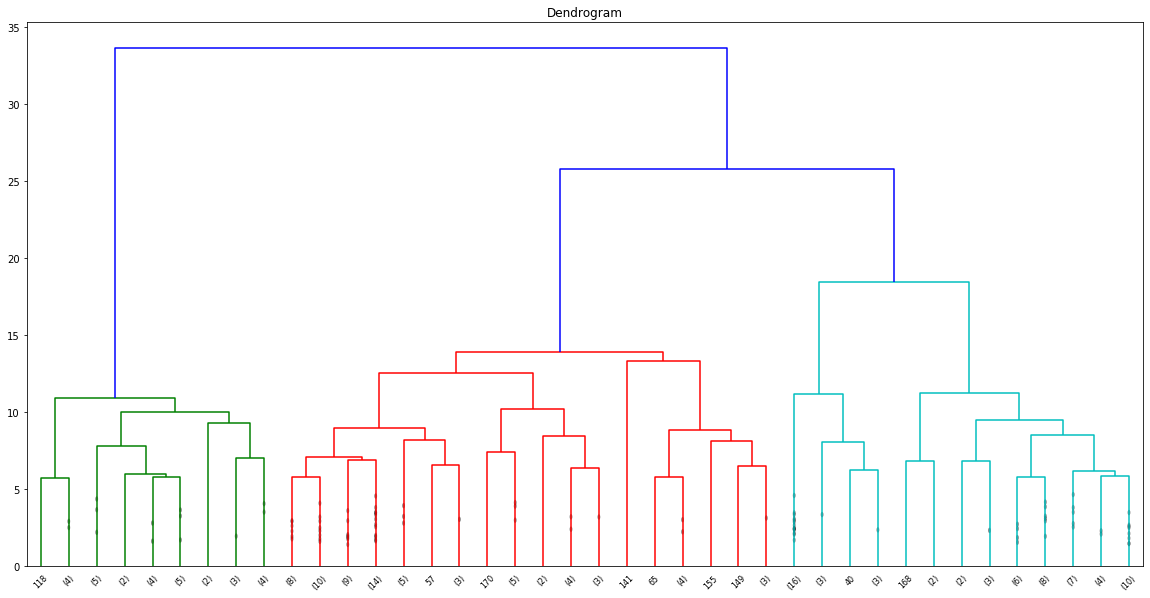

In [101]:
plt.figure(figsize=(20,10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(cb_data_scaled[scal_cols], method='ward', metric = 'euclidean'),truncate_mode = 'lastp',p=40, show_contracted = True)

In [153]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
groups = cluster.fit_predict(cb_data_scaled[scal_cols])
groups

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [154]:
groupsdf = pd.DataFrame(groups, columns=['groups'])

In [155]:
cb_data_copy = cb_data_cluster_att_2
cb_data_grp_copy = pd.concat([cb_data_copy,groupsdf],axis=1)

In [156]:
cb_data_grp_copy = cb_data_grp_copy.astype({'groups':'category'})

In [158]:
cb_data_grp_copy.loc[cb_data_grp_copy['groups']==0]

,index,player_name,team,position,footedness,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,att_LF_offcontri,att_LC_offcontri,att_RC_offcontri,att_RF_offcontri,foot_left,foot_right,init_x,final_x,init_y,final_y,groups
1,7,AdrianMariappa,Watford,L_CB,right,43.48,23.91,15.22,10.87,1.573852,3.925124,10.267141,3.539957,1.116967,0.753206,0.736977,1.015065,0,1,20.216433,39.807615,38.428858,38.428858,0
2,9,AdrianMariappa,Watford,RCB,right,8.25,10.31,19.59,44.33,3.459880,13.321521,5.660290,3.638874,0.960691,0.694656,0.716860,0.932983,0,1,19.799599,45.643287,5.178357,5.178357,0
3,10,AdrianMariappa,Watford,R_CB,right,8.57,25.71,17.14,28.57,4.365592,26.320795,1.666600,1.050037,0.893748,0.695401,0.748157,0.726025,0,1,18.132265,38.348697,12.128257,12.128257,0
4,11,AhmedHegazi,West Brom,CB,right,23.73,15.25,16.95,35.59,3.901891,7.576896,19.058473,3.556777,1.008954,0.813059,0.804224,1.039851,0,1,20.424850,39.390782,22.348697,22.348697,0
5,12,AhmedHegazi,West Brom,LCB,right,28.21,12.82,15.38,20.51,3.284209,-0.649572,4.232887,2.545850,1.002615,0.712870,0.757336,0.948245,0,1,18.757515,45.018036,40.472946,40.472946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,371,WinstonReid,West Ham,RCB,right,12.07,22.41,17.24,29.31,3.716140,14.680993,7.444940,2.062747,0.929899,0.807340,0.777984,0.860018,0,1,27.094188,53.979960,8.993988,8.993988,0
168,372,WinstonReid,West Ham,R_CB,right,18.42,13.16,18.42,31.58,3.872738,-0.480172,7.364796,2.808728,0.930892,1.149248,0.764183,1.165813,0,1,21.883768,42.100200,15.535070,15.535070,0
169,375,YounesKaboul,Watford,R_CB,right,14.29,14.29,19.05,38.10,10.004159,14.266513,11.470308,3.065371,0.996369,0.736724,0.542834,0.871366,0,1,18.132265,44.392786,4.496994,4.496994,0
170,376,Zanka,Huddersfield,RCB,right,0.00,12.50,54.17,20.83,0.000000,5.753452,3.784120,2.230095,0.961473,0.866685,0.817125,0.922806,0,1,16.256513,41.891784,8.448898,8.448898,0


In [159]:
def plot_groups(df,region):
    regions = [
        'leftflank_attack', 'leftcentral_attack',
        'rightcentral_attack', 'rightflank_attack'
    ]
    fig = px.scatter(df,x='att_'+region+'_pref',y='att_'+region+'_off',color='groups', hover_data=['player_name','team','position','footedness'])
    fig.show()

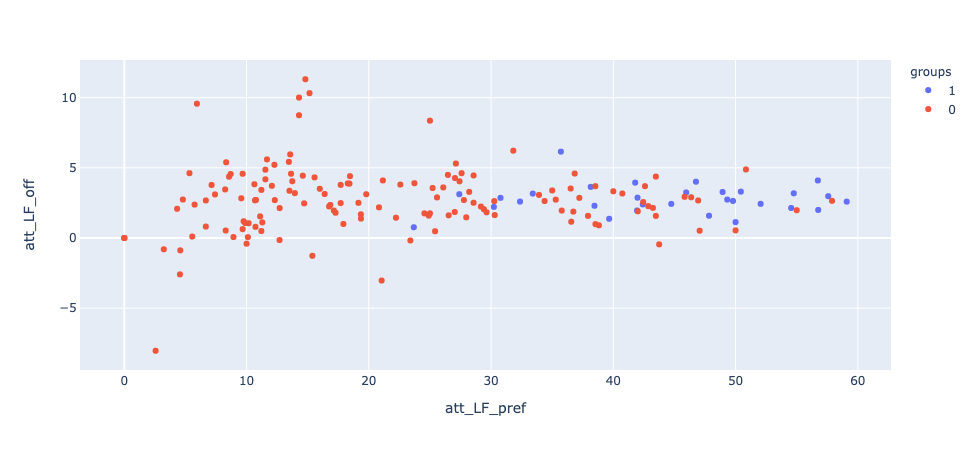

In [161]:
plot_groups(cb_data_grp_copy,'LF')

In [162]:
tsne = TSNE(n_components=2, perplexity=13, verbose=1,n_iter=1000, metric = 'euclidean')
tsne_results = tsne.fit_transform(cb_data_grp_copy.iloc[:,5:-1])

[t-SNE] Computing 40 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 7.115368
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.851021
[t-SNE] KL divergence after 1000 iterations: 0.536104


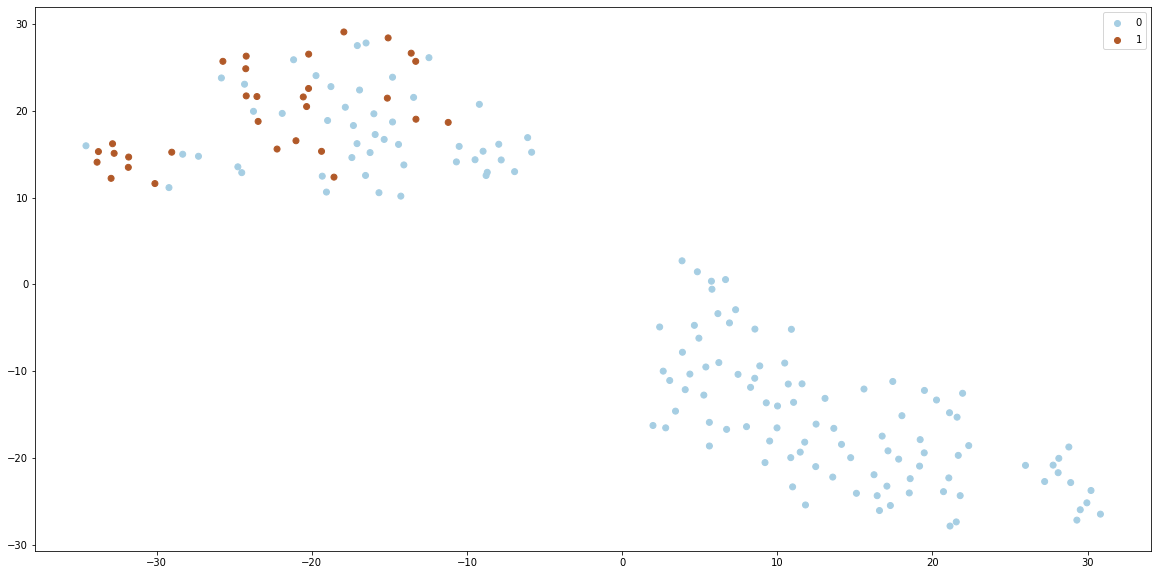

In [163]:
plt.figure(figsize=(20,10))
scatter1 = plt.scatter(tsne_results[:,0],tsne_results[:,1],c=cb_data_grp_copy['groups'].tolist(),cmap='Paired')
plt.legend(*scatter1.legend_elements())